DATA SCIENCE PROJECT GROUP#10

ABOUT THE DATA
This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals 
correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

References
United Nations Development Program. (2018). Human development index (HDI). 
Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. 
Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset].
Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. 
Retrieved from http://www.who.int/mental_health/suicide-prevention/en/


G.I Generation:                              pre-1928
Traditionalists/ Silent Generation:          1928 - 1946
Baby Boomers:                                1946 - 1964
Gen X:                                       1965 - 1976
Gen Y / Millennials:                         1977 - 1995
Gen Z / iGen / Centennials                   1995 - 2010

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
sns.set()
%matplotlib inline

In [2]:
#importing data and storing in a pandas dataframe
url = 'https://raw.githubusercontent.com/hkaramali/Data-Science-1---Group-Project/main/master.csv?token=ASCKA4U2OSTHY65AZBQT55272JGF4'
Data = pd.read_csv(url)
Data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
Data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
#CHECKING FOR UNIQUES VALUES AND FOR NUMBER OF MISSING VALUES
print(Data.isnull().sum())

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


 SINGLE VARIABLE ANALYSIS ON YEAR

In [6]:
# We should have 12 rows for every country-year combination. 
# That is, 6 age groups * 2 genders.
df_22 = Data.groupby("country-year").count()
df_22.loc[df_22["country"] <12, "year"]

country-year
Armenia2016           10
Austria2016           10
Croatia2016           10
Cyprus2016            10
Czech Republic2016    10
Grenada2016           10
Hungary2016           10
Iceland2016           10
Lithuania2016         10
Mauritius2016         10
Mongolia2016          10
Netherlands2016       10
Qatar2016             10
Romania2016           10
Sweden2016            10
Thailand2016          10
Name: year, dtype: int64

In [7]:
# We have found that year 2016 has some data missing (< 12), so we decided to get rid of 2016 data
Data = Data[Data.year != 2016]

In [8]:
# The counts
Data["year"].value_counts()
# We see that in the 2000's, we have more data than in the 80s

2009    1068
2010    1056
2001    1056
2011    1032
2003    1032
2002    1032
2007    1032
2000    1032
2008    1020
2006    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
Name: year, dtype: int64

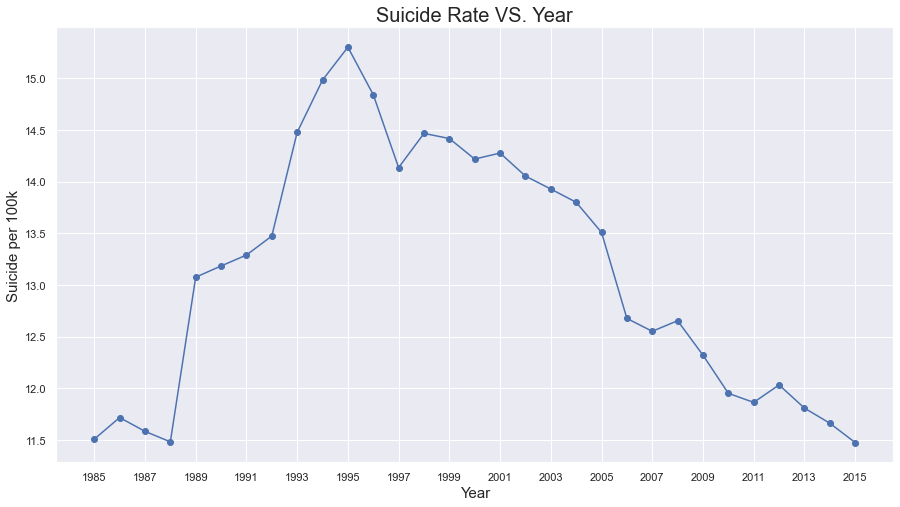

In [9]:
df2 = Data.groupby("year").agg({"suicides_no":'sum',"population":'sum'})
df2["Suicide per 100k"] = (df2["suicides_no"]/df2["population"])*100000
df2.head()
df2 = df2.reset_index()
fig, axs = plt.subplots(figsize=(15,8))
axs.plot(df2["year"], df2["Suicide per 100k"],'-ok',color='C0')
axs.set_xticks(range(1985,2016,2));
plt.xlabel("Year",fontsize=15);
plt.ylabel("Suicide per 100k",fontsize=15);
plt.title("Suicide Rate VS. Year",fontsize=20)
plt.show()

SINGLE VARIABLE ANALYSIS ON GENERATION

In [10]:
Data_Gby_generation=Data.groupby(['generation'])['suicides_no','suicides/100k pop'].aggregate(['min','max',np.mean,'count','sum'])
Data_Gby_generation.head(100)

<ipython-input-10-13edc6ff5c46>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data_Gby_generation=Data.groupby(['generation'])['suicides_no','suicides/100k pop'].aggregate(['min','max',np.mean,'count','sum'])


suicides_no                                    \
                        min    max        mean count      sum   
generation                                                      
Boomers                   0  22338  459.819080  4958  2279783   
G.I. Generation           0   6401  185.863338  2744   510009   
Generation X              0  11767  239.497804  6376  1527038   
Generation Z              0    277   10.820408  1470    15906   
Millenials                0   6945  107.300000  5780   620194   
Silent                    0  12517  281.093967  6332  1779887   

                suicides/100k pop                                      
                              min     max       mean count        sum  
generation                                                             
Boomers                       0.0  151.33  14.740224  4958   73082.03  
G.I. Generation               0.0  224.97  23.946378  2744   65708.86  
Generation X                  0.0   94.28  10.543115  6376   67222.90  
Generation Z                  0.0   11.02   0.642299  1470     944.18  
Millenials                    0.0   71.17   5.344246  5780   30889.74  
Silent                        0.0  204.92  18.406306  6332  116548.73

In [11]:
Barchart_data=Data_Gby_generation.loc[:,'suicides_no']['sum']
Barchart_data=Barchart_data.reset_index()
Barchart_data

,generation,sum
0,Boomers,2279783
1,G.I. Generation,510009
2,Generation X,1527038
3,Generation Z,15906
4,Millenials,620194
5,Silent,1779887


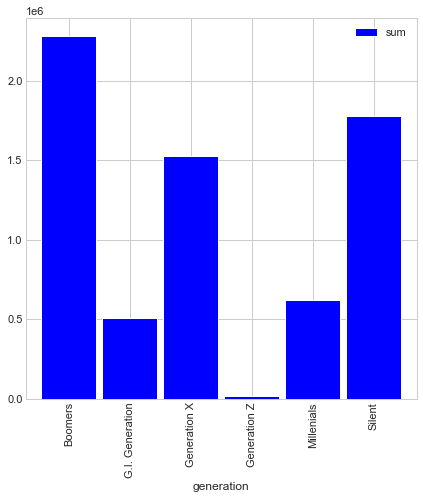

In [12]:
plt.style.use('seaborn-whitegrid') 
plt.rcParams["figure.figsize"] = (7,7)
Barchart_data.plot(x = 'generation', y = 'sum', kind='bar', color = 'blue', width=0.9)
plt.xlabel='number of suicides'
plt.show()

SINGLE VARIABLE ANALYSIS ON GENDER

In [13]:
#Displaying suicide data groubed by sex. Highlight differences in suicide rates between sex.
gender_suicides = Data.groupby('sex')['suicides_no'].describe()
print(gender_suicides)
gender_suicides_totals = Data.groupby('sex')['suicides_no'].sum()
print(gender_suicides_totals)

          count        mean          std  min  25%   50%    75%      max
sex                                                                     
female  13830.0  112.509472   334.378143  0.0  1.0  14.0   73.0   4053.0
male    13830.0  374.317498  1220.729784  0.0  4.0  48.0  235.0  22338.0
sex
female    1556006
male      5176811
Name: suicides_no, dtype: int64


In [14]:
#Displaying suicide/100k pop data grouped by sex. Highlight differences in suicide rates between sex.
gender_suicides_100k = Data.groupby('sex')['suicides/100k pop'].describe()
print(gender_suicides_100k)
gender_suicides_100k_totals = Data.groupby('sex')['suicides/100k pop'].sum()
print(gender_suicides_100k_totals)

          count       mean        std  min     25%    50%    75%     max
sex                                                                     
female  13830.0   5.396188   7.372062  0.0  0.4100   3.16   7.41  133.42
male    13830.0  20.229007  23.569957  0.0  2.3825  13.52  27.36  224.97
sex
female     74629.28
male      279767.16
Name: suicides/100k pop, dtype: float64


In [15]:
#Converting gender suicide totals into a dataframe
gender_suicides_df = gender_suicides_totals.to_frame()
gender_suicides_df['suicides/100k pop'] = gender_suicides_100k_totals
#making the gender a column instead of the index for ploting)
gender_suicides_df = gender_suicides_df.reset_index()

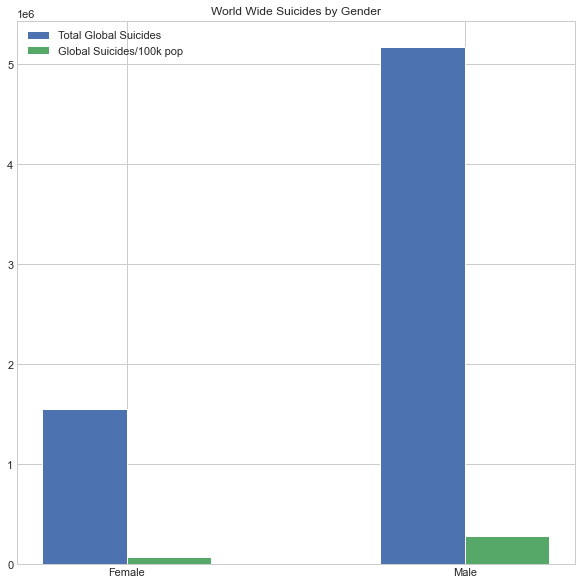

In [16]:
#Set up for bar graph
fig, ax = plt.subplots(figsize=(10, 10))
n_groups, width = 2, 0.25
x=np.arange(n_groups)

#Bar graph values
total_gender_suicides_chart= ax.bar(x, gender_suicides_df['suicides_no'], width, color ='b', align ='center')
gender_suicides_100kpop_chart= ax.bar(x+width, gender_suicides_df['suicides/100k pop'], width, color ='g', align ='center')

#Bar graph labelling
ax.set(title= 'World Wide Suicides by Gender', xticks= x+width/2, xticklabels = ['Female', 'Male'])
ax.legend((total_gender_suicides_chart[0], gender_suicides_100kpop_chart[0]), ('Total Global Suicides', 'Global Suicides/100k pop'), loc='upper left')

Text(0.5, 1.0, 'Global Suicide Total by Sex')

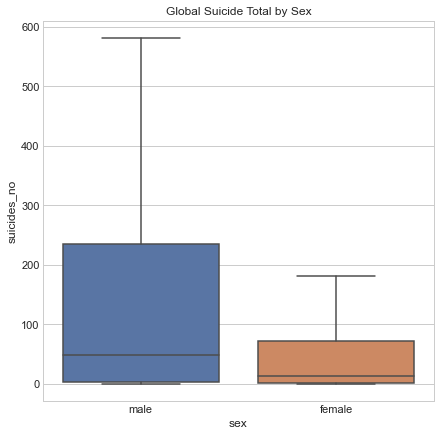

In [17]:
sns.boxplot(x='sex', y='suicides_no', data=Data, showfliers= False).set_title('Global Suicide Total by Sex')

Text(0.5, 1.0, 'Global Suicides/100K Population by Sex')

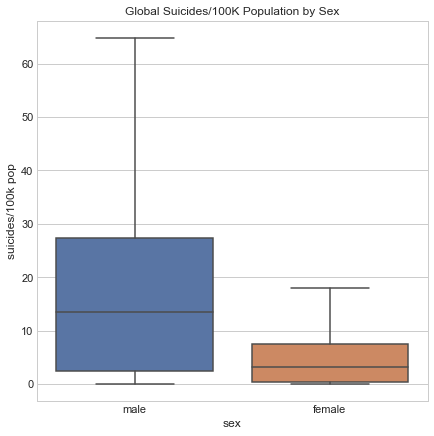

In [18]:
sns.boxplot(x='sex', y='suicides/100k pop', data=Data, showfliers= False).set_title('Global Suicides/100K Population by Sex')

SINGLE VARIABLE ANALYSIS ON COUNTRY

In [19]:
country_grouped = Data.groupby(['country']).mean()
country_grouped_suicide_rates = country_grouped[['suicides_no', 'suicides/100k pop']]
country_grouped_suicide_rates

,suicides_no,suicides/100k pop
country,,
Albania,7.462121,3.502879
Antigua and Barbuda,0.033951,0.552901
Argentina,221.018817,10.469328
Armenia,6.381944,3.248785
Aruba,0.601190,9.503095
...,...,...
United Arab Emirates,8.638889,1.317917
United Kingdom,367.755376,7.502473
United States,2779.604839,13.819812


In [20]:
country_grouped_suicide_rates.sort_values(by=['suicides_no']).tail(10)

,suicides_no,suicides/100k pop
country,,
Sri Lanka,421.522727,35.295152
Poland,482.979167,15.269514
Brazil,609.174731,5.846022
Republic of Korea,703.575269,25.135618
France,914.241667,21.675694
Germany,933.532051,15.559904
Ukraine,952.232143,26.582321
Japan,2169.091398,21.573199
United States,2779.604839,13.819812


In [21]:
country_grouped_suicide_rates.sort_values(by=['suicides_no']).head(10)

,suicides_no,suicides/100k pop
country,,
Dominica,0.000000,0.000000
Saint Kitts and Nevis,0.000000,0.000000
Antigua and Barbuda,0.033951,0.552901
San Marino,0.111111,4.045000
Grenada,0.126667,2.203333
Maldives,0.166667,1.367333
Bahamas,0.336957,1.247391
Kiribati,0.401515,6.655379
Saint Vincent and Grenadines,0.413333,5.755433


In [22]:
country_grouped_suicide_rates.sort_values(by=['suicides/100k pop']).tail(15)

,suicides_no,suicides/100k pop
country,,
Guyana,11.420000,22.186400
Finland,96.772989,22.770431
Croatia,70.420635,22.893968
Austria,131.376344,23.905914
Republic of Korea,703.575269,25.135618
Ukraine,952.232143,26.582321
Estonia,27.912698,27.276905
Slovenia,42.123016,27.827857
Latvia,50.674603,29.259325


In [23]:
country_grouped_suicide_rates.sort_values(by=['suicides/100k pop']).head(15)

,suicides_no,suicides/100k pop
country,,
Saint Kitts and Nevis,0.000000,0.000000
Dominica,0.000000,0.000000
Jamaica,0.901961,0.521765
Antigua and Barbuda,0.033951,0.552901
Oman,0.916667,0.736111
South Africa,30.504167,0.964542
Kuwait,3.220000,1.186433
Bahamas,0.336957,1.247391
United Arab Emirates,8.638889,1.317917


In [24]:
# NOW WE ARE GOING TO LOAD ANOTHER DATASET, THAT CONTAINS THE CONTINENT FOR EACH COUNTRY,
# AND MERGE IT TO OUR MASTER DATAFRAME

continent_Data = pd.read_csv('country_continent.csv')
continent_Data.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,Afghanistan,AF,AFG,4.0
1,Europe,EU,Albania,AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,Algeria,DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [25]:
merged = pd.merge(left=Data, right=continent_Data, left_on='country', right_on='Country_Name')
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27540 entries, 0 to 27539
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    27540 non-null  object 
 1   year                       27540 non-null  int64  
 2   sex                        27540 non-null  object 
 3   age                        27540 non-null  object 
 4   suicides_no                27540 non-null  int64  
 5   population                 27540 non-null  int64  
 6   suicides/100k pop          27540 non-null  float64
 7   country-year               27540 non-null  object 
 8   HDI for year               8268 non-null   float64
 9    gdp_for_year ($)          27540 non-null  object 
 10  gdp_per_capita ($)         27540 non-null  int64  
 11  generation                 27540 non-null  object 
 12  Continent_Name             27540 non-null  object 
 13  Continent_Code             22092 non-null  obj

In [26]:
merged.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
27535,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,Asia,AS,Uzbekistan,UZ,UZB,860.0
27536,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,Asia,AS,Uzbekistan,UZ,UZB,860.0
27537,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia,AS,Uzbekistan,UZ,UZB,860.0
27538,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia,AS,Uzbekistan,UZ,UZB,860.0
27539,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers,Asia,AS,Uzbekistan,UZ,UZB,860.0


In [27]:
continent_grouped = merged.groupby(['Continent_Name']).mean()
continent_grouped_suicide_rates = continent_grouped[['suicides/100k pop']]
continent_grouped_suicide_rates

,suicides/100k pop
Continent_Name,
Africa,7.555131
Asia,13.914810
Europe,16.312943
North America,7.546424
Oceania,11.561831
South America,11.428745


BI-VARIABLE ANALYSIS ON GENERATION AND YEAR

In [28]:
Data_Gby_generation_year=Data.groupby(['generation','year'])['suicides_no','suicides/100k pop'].aggregate(['min','max',np.mean,'count','sum'])
Data_Gby_generation_year.head(100)

<ipython-input-28-cff9c8b9b9c7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data_Gby_generation_year=Data.groupby(['generation','year'])['suicides_no','suicides/100k pop'].aggregate(['min','max',np.mean,'count','sum'])


suicides_no                                suicides/100k pop  \
                        min   max        mean count    sum               min   
generation year                                                                
Boomers    1985           0  5134  216.364583    96  20771               0.0   
           1986           0  5450  225.885417    96  21685               0.0   
           1987           0  5370  206.564815   108  22309               0.0   
           1988           0  5463  217.673469    98  21332               0.0   
           1989           0  6856  282.951923   104  29427               0.0   
...                     ...   ...         ...   ...    ...               ...   
Millenials 2000           0   404   12.005814   172   2065               0.0   
           2001           0  6945   93.468750   352  32901               0.0   
           2002           0  6667   96.369186   344  33151               0.0   
           2003           0  6134   94.276163   344  32431               0.0   
           2004           0  5891   90.895833   336  30541               0.0   

                                                  
                   max       mean count      sum  
generation year                                   
Boomers    1985  79.50  10.008750    96   960.84  
           1986  79.75  10.593854    96  1017.01  
           1987  55.81  10.960370   108  1183.72  
           1988  60.38  12.410102    98  1216.19  
           1989  53.78  12.178173   104  1266.53  
...                ...        ...   ...      ...  
Millenials 2000   5.77   0.532442   172    91.58  
           2001  60.14   4.897472   352  1723.91  
           2002  61.17   5.089128   344  1750.66  
           2003  50.05   4.818576   344  1657.59  
           2004  49.66   4.653839   336  1563.69  

[100 rows x 10 columns]

In [29]:
Data_Gby_generation_year.loc[:,'suicides_no']['sum'].sort_values(ascending=False).head(5)

generation    year
Boomers       1994    125932
Generation X  2010    125681
Boomers       1993    119714
              1992    112809
              1991    103989
Name: sum, dtype: int64

In [30]:
Data_Gby_generation_year.loc[:,'suicides/100k pop']['sum'].sort_values(ascending=False).head(5)

generation  year
Silent      2002    7402.68
            2001    7334.39
            2003    7060.51
            2004    6495.19
            2007    6455.87
Name: sum, dtype: float64

In [31]:
Data_Gby_generation_year.loc[:,'suicides_no']['max'].sort_values(ascending=False).head(5)

generation  year
Boomers     1994    22338
            1995    21706
            2001    21262
            2000    21063
            1999    20705
Name: max, dtype: int64

In [32]:
Data_Gby_generation_year.loc[:,'suicides/100k pop']['max'].sort_values(ascending=False).head(5)

generation       year
G.I. Generation  1995    224.97
Silent           2006    204.92
                 2012    187.06
                 2011    185.37
                 2010    182.32
Name: max, dtype: float64

BI-VARIABLE ANALYSIS ON GENDER AND YEAR

Text(0.5, 1.0, 'Suicide Rate VS. Year')

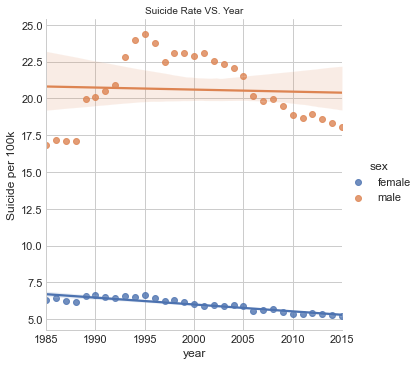

In [33]:
# Now we look at sex and year vs suicide

df3 = Data.groupby(["sex","year"]).agg({"suicides_no":'sum',"population":'sum'})
df3["Suicide per 100k"] = (df3["suicides_no"]/df3["population"])*100000
dtest = df3.reset_index()
g2 = sns.lmplot(x="year", y="Suicide per 100k", hue = "sex",data=dtest)
ax = plt.gca()
ax.set_title("Suicide Rate VS. Year",fontsize=10)

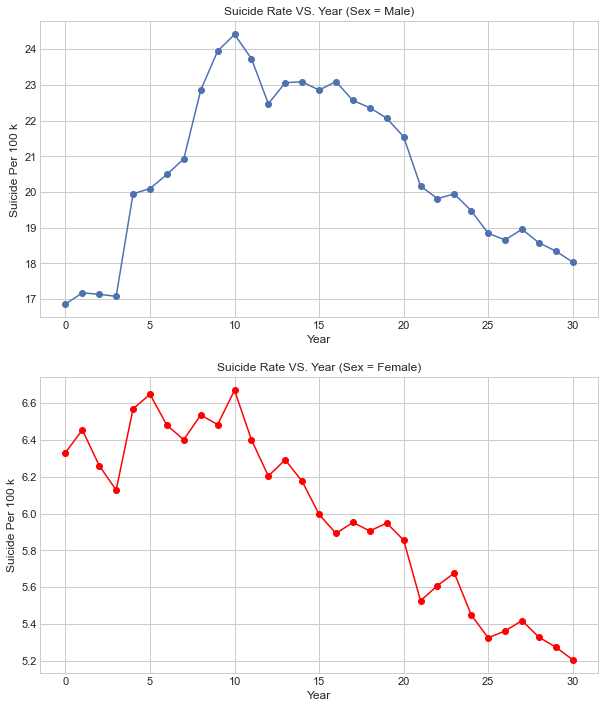

In [34]:
# I want to also look at each gender in a seperate plot, so that I will have a more "zoomed" in
# graph, this will help me see any trends more clearly

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

ax1.plot(df2.index, df3.iloc[df3.index.get_level_values('sex') == "male", [2]],'-ok',color='C0', label = "male")
ax1.set_xlabel("Year");
ax1.set_ylabel("Suicide Per 100 k");
ax1.set_title("Suicide Rate VS. Year (Sex = Male)");
ax2.plot(df2.index, df3.iloc[df3.index.get_level_values('sex') == "female", [2]],'-ok',c = "red", label = "female")
ax2.set_xlabel("Year");
ax2.set_ylabel("Suicide Per 100 k");
ax2.set_title("Suicide Rate VS. Year (Sex = Female)");



BI-VARIABLE ANALYSIS ON YEAR AND COUNTRY

In [35]:
# Year/Country
df_yc = Data[['year', 'country', 'suicides_no']]
df_yc

,year,country,suicides_no
0,1987,Albania,21
1,1987,Albania,16
2,1987,Albania,14
3,1987,Albania,1
4,1987,Albania,9
...,...,...,...
27815,2014,Uzbekistan,107
27816,2014,Uzbekistan,9
27817,2014,Uzbekistan,60
27818,2014,Uzbekistan,44


In [36]:
year_country_suicides = df_yc.groupby('country')['year'].describe().round(0).astype(int)
year_country_suicides

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Albania,264,1999,7,1987,1994,2000,2005,2010
Antigua and Barbuda,324,1999,9,1985,1991,2000,2007,2015
Argentina,372,2000,9,1985,1992,2000,2008,2015
Armenia,288,2002,8,1990,1996,2002,2009,2015
Aruba,168,2004,4,1995,2001,2004,2008,2011
...,...,...,...,...,...,...,...,...
United Arab Emirates,72,2008,2,2005,2006,2008,2009,2010
United Kingdom,372,2000,9,1985,1992,2000,2008,2015
United States,372,2000,9,1985,1992,2000,2008,2015


In [37]:
df_ycs = Data[['country', 'year', 'suicides_no', 'suicides/100k pop']]
df_ycs
#get the data needed

,country,year,suicides_no,suicides/100k pop
0,Albania,1987,21,6.71
1,Albania,1987,16,5.19
2,Albania,1987,14,4.83
3,Albania,1987,1,4.59
4,Albania,1987,9,3.28
...,...,...,...,...
27815,Uzbekistan,2014,107,2.96
27816,Uzbekistan,2014,9,2.58
27817,Uzbekistan,2014,60,2.17
27818,Uzbekistan,2014,44,1.67


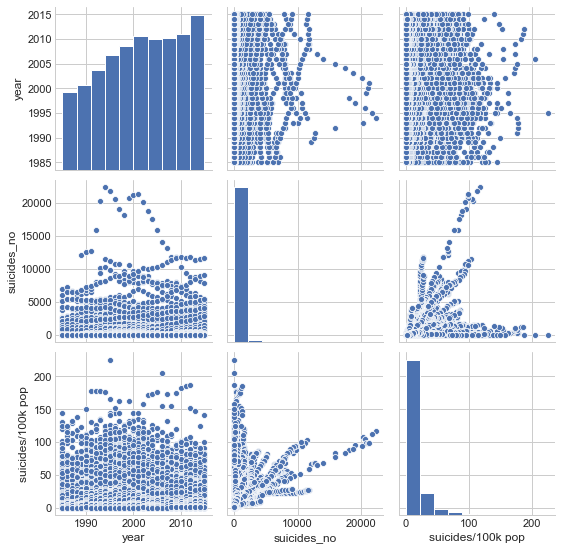

In [38]:
p1 = sns.pairplot(df_ycs) #to see all the possibilities

In [39]:
df_d1 = df_ycs.groupby(['country', 'year']).describe() #general info of C/Y
df_d1

suicides_no                                             \
                      count        mean         std  min    25%    50%   
country    year                                                          
Albania    1987        12.0    6.083333    7.292067  0.0   0.75    2.5   
           1988        12.0    5.250000    5.344921  0.0   1.75    4.0   
           1989        12.0    5.666667    6.227992  0.0   0.75    3.5   
           1992        12.0    3.916667    4.100074  0.0   0.00    3.0   
           1993        12.0    6.083333    5.350588  0.0   1.00    7.0   
...                     ...         ...         ...  ...    ...    ...   
Uzbekistan 2010        12.0  122.000000  117.108341  5.0  26.50   97.0   
           2011        12.0  136.666667  142.647903  5.0  25.75   77.0   
           2012        12.0  152.916667  143.795599  4.0  22.75  111.0   
           2013        12.0  162.500000  159.383186  8.0  28.50  109.0   
           2014        12.0  174.583333  167.962906  9.0  38.25  125.5   

                               suicides/100k pop                            \
                    75%    max             count      mean       std   min   
country    year                                                              
Albania    1987   10.25   21.0              12.0  2.654167  2.297538  0.00   
           1988    5.75   17.0              12.0  2.705000  1.886182  0.00   
           1989    8.25   18.0              12.0  2.783333  2.858052  0.00   
           1992    7.00   12.0              12.0  1.500000  1.459956  0.00   
           1993    9.25   18.0              12.0  2.713333  2.138595  0.00   
...                 ...    ...               ...       ...       ...   ...   
Uzbekistan 2010  214.75  371.0              12.0  5.269167  3.798948  1.14   
           2011  252.00  457.0              12.0  5.595000  4.260176  1.08   
           2012  295.25  404.0              12.0  6.460833  4.569324  0.62   
           2013  320.75  481.0              12.0  6.571667  4.686243  1.19   
           2014  325.25  519.0              12.0  7.093333  4.901678  1.46   

                                                
                    25%    50%      75%    max  
country    year                                 
Albania    1987  0.5475  2.480   4.6500   6.71  
           1988  1.6950  2.370   4.4650   5.49  
           1989  0.5025  2.050   4.3425   8.89  
           1992  0.0000  1.060   2.9200   3.49  
           1993  0.9575  2.760   3.9650   7.40  
...                 ...    ...      ...    ...  
Uzbekistan 2010  1.6925  4.240   8.2125  11.81  
           2011  1.6350  5.255   8.0700  14.26  
           2012  2.3475  6.405  10.9750  12.34  
           2013  2.3000  5.695  10.2250  14.37  
           2014  2.4775  6.740  11.3950  15.17  

[2305 rows x 16 columns]

In [40]:
df_d2 = df_ycs.groupby(['country', 'year']).sum()
df_d2 = df_d2.drop(['suicides/100k pop'], axis=1)
df_d2 

suicides_no
country    year             
Albania    1987           73
           1988           63
           1989           68
           1992           47
           1993           73
...                      ...
Uzbekistan 2010         1464
           2011         1640
           2012         1835
           2013         1950
           2014         2095

[2305 rows x 1 columns]

In [41]:
df_d3 = df_ycs.groupby(['country', 'year']).mean()
df_d3 = df_d3.sort_values(by = ['suicides/100k pop'], ascending = False).drop(['suicides_no'], axis=1)
df_d3 #top countries with the highest average suicide rate by year

suicides/100k pop
country             year                   
Lithuania           1995          53.275000
                    1996          49.634167
Hungary             1991          47.916667
Lithuania           2000          47.650000
Hungary             1992          47.521667
...                                     ...
Antigua and Barbuda 1995           0.000000
                    1994           0.000000
Grenada             2001           0.000000
Maldives            2000           0.000000
Antigua and Barbuda 1992           0.000000

[2305 rows x 1 columns]

In [42]:
d1 = df_d2.sort_values(by = ['suicides_no'], ascending = False)
#pd.set_option('display.max_rows', None)
d1 #top countries with the highest suicide number by year

suicides_no
country               year             
Russian Federation    1994        61420
                      1995        60548
                      1996        57511
                      1999        56974
                      2001        56958
...                                 ...
Antigua and Barbuda   1991            0
Kiribati              2000            0
Antigua and Barbuda   1994            0
                      1995            0
Saint Kitts and Nevis 1991            0

[2305 rows x 1 columns]

In [43]:
df_ru_n = d1.loc['Russian Federation']
df_ru_n #Russia's example

,suicides_no
year,
1994,61420
1995,60548
1996,57511
1999,56974
2001,56958
2000,56619
1993,55846
2002,55024
1997,54746


In [44]:
d1a = df_d3.loc['Russian Federation'].reset_index()

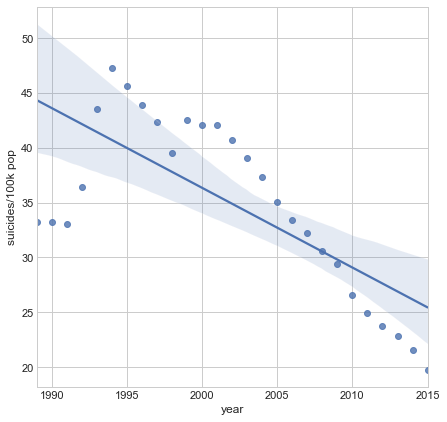

In [45]:
sns.regplot(x='year', y='suicides/100k pop', data=d1a) #Russian Federation’s suicide rates plot

In [46]:
# NOW LETS LOOK AT THE CONTINENTS

continent_year_grouped = merged.groupby(['Continent_Name','year']).mean()
continent_year_grouped_suicide_rates = continent_year_grouped[['suicides/100k pop']]
continent_year_grouped_suicide_rates

suicides/100k pop
Continent_Name year                   
Africa         1985          12.471250
               1986           2.222083
               1987           9.694167
               1988          20.509167
               1989          17.636667
...                                ...
South America  2011          13.067396
               2012          15.219907
               2013          13.013148
               2014          11.798125
               2015          10.764861

[186 rows x 1 columns]

In [47]:
# We decided to preform autocorrelation plot for select continents to see if the time period
# significantly influenced the rate of suicide.

merged_europe = merged.loc[merged['Continent_Name'] == 'Europe']
merged_europe_select = merged_europe[['year', 'suicides/100k pop','Continent_Name']]
merged_europe_grouped = merged_europe_select.groupby(['Continent_Name','year']).mean()
merged_europe_grouped

suicides/100k pop
Continent_Name year                   
Europe         1985          15.749345
               1986          15.343944
               1987          16.575877
               1988          15.747719
               1989          16.666389
               1990          16.135093
               1991          17.507440
               1992          17.019139
               1993          17.410948
               1994          17.541075
               1995          20.313063
               1996          20.058333
               1997          19.982801
               1998          19.133356
               1999          18.203396
               2000          17.617134
               2001          17.827778
               2002          17.887434
               2003          17.111075
               2004          15.774640
               2005          15.648986
               2006          14.127703
               2007          14.662396
               2008          15.383289
               2009          14.652646
               2010          13.969957
               2011          13.511886
               2012          13.649955
               2013          13.612140
               2014          13.529786
               2015          13.111016

Text(0.5, 0, 'Lag - Years')

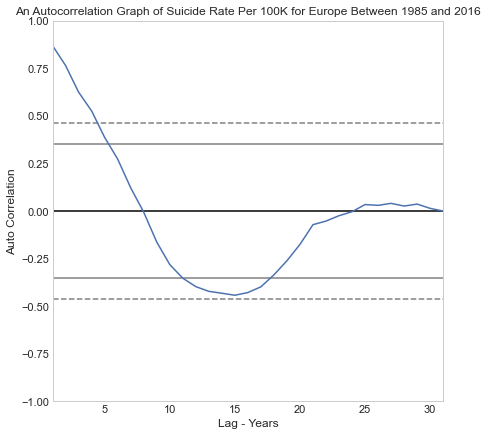

In [48]:
# Autocoreelation plot 
AC_Plot_Europe = pd.plotting.autocorrelation_plot(merged_europe_grouped)
AC_Plot_Europe.set_title("An Autocorrelation Graph of Suicide Rate Per 100K for Europe Between 1985 and 2016")
AC_Plot_Europe.set_ylabel("Auto Correlation")
AC_Plot_Europe.set_xlabel("Lag - Years")

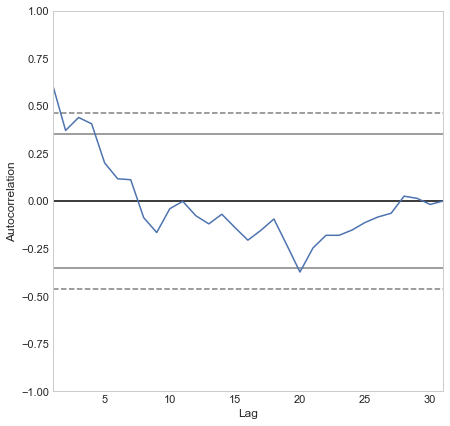

In [49]:
merged_africa = merged.loc[merged['Continent_Name'] == 'Africa']
merged_africa_select = merged_africa[['year', 'suicides/100k pop','Continent_Name']]
merged_africa_grouped = merged_africa_select.groupby(['Continent_Name','year']).mean()
AC_Plot_africa = pd.plotting.autocorrelation_plot(merged_africa_grouped)

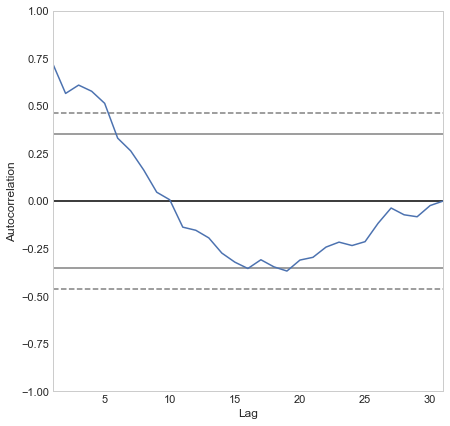

In [50]:
merged_asia = merged.loc[merged['Continent_Name'] == 'Asia']
merged_asia_select = merged_asia[['year', 'suicides/100k pop','Continent_Name']]
merged_asia_grouped = merged_asia_select.groupby(['Continent_Name','year']).mean()
AC_Plot_asia = pd.plotting.autocorrelation_plot(merged_asia_grouped)

Text(0.5, 0, 'Lag - Years')

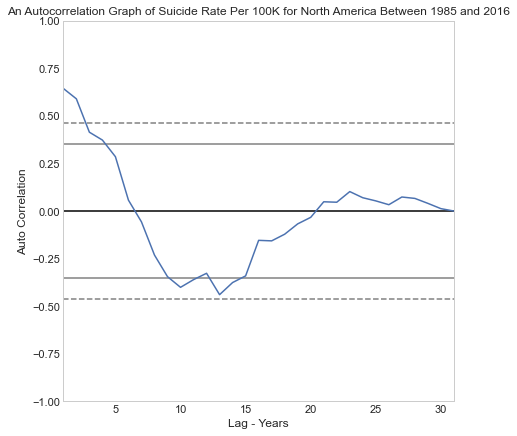

In [51]:
merged_north_america = merged.loc[merged['Continent_Name'] == 'North America']
merged_north_america_select = merged_north_america[['year', 'suicides/100k pop','Continent_Name']]
merged_north_america_grouped = merged_north_america_select.groupby(['Continent_Name','year']).mean()
AC_Plot_north_america = pd.plotting.autocorrelation_plot(merged_north_america_grouped)
AC_Plot_north_america.set_title("An Autocorrelation Graph of Suicide Rate Per 100K for North America Between 1985 and 2016")
AC_Plot_north_america.set_ylabel("Auto Correlation")
AC_Plot_north_america.set_xlabel("Lag - Years")

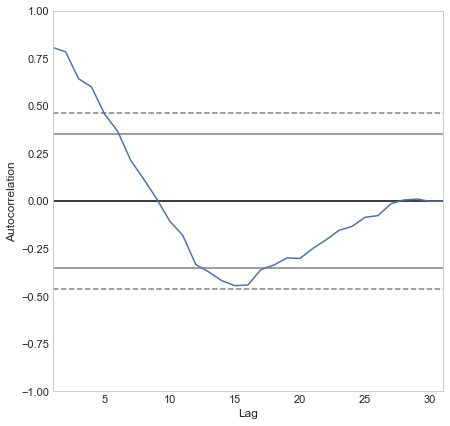

In [52]:
merged_south_america = merged.loc[merged['Continent_Name'] == 'South America']
merged_south_america_select = merged_south_america[['year', 'suicides/100k pop','Continent_Name']]
merged_south_america_grouped = merged_south_america_select.groupby(['Continent_Name','year']).mean()
AC_Plot_south_america = pd.plotting.autocorrelation_plot(merged_south_america_grouped)

BI-VARIABLE ANALYSIS ON SEX AND COUNTRY

In [53]:
#Before beginning analysis on the two variables, double checking the data on country. 
#Some countries have low amounts of data but the decision was made to keep the countries as it did not impact correlation
pd.set_option('display.max_rows', None)
sex_by_country_suicides = Data.groupby('country')['suicides_no'].describe().reset_index()
sex_by_country_suicides

,country,count,mean,std,min,25%,50%,75%,max
0,Albania,264.0,7.462121,8.414098,0.0,1.00,5.0,11.25,39.0
1,Antigua and Barbuda,324.0,0.033951,0.197716,0.0,0.00,0.0,0.00,2.0
2,Argentina,372.0,221.018817,196.017402,7.0,61.00,164.0,360.00,745.0
3,Armenia,288.0,6.381944,6.779243,0.0,1.00,4.0,10.00,32.0
4,Aruba,168.0,0.601190,1.067427,0.0,0.00,0.0,1.00,4.0
5,Australia,360.0,194.752778,197.340980,0.0,50.75,110.5,306.00,944.0
6,Austria,372.0,131.376344,119.225910,0.0,28.75,101.5,186.25,515.0
7,Azerbaijan,192.0,8.625000,10.960901,0.0,2.00,5.0,11.00,79.0
8,Bahamas,276.0,0.336957,0.722780,0.0,0.00,0.0,0.00,5.0
9,Bahrain,252.0,1.837302,3.639277,0.0,0.00,0.0,2.00,21.0


In [54]:
#Creating new condensed dataframe for the bivariable analysis
d2 = Data[['country','sex','suicides_no', 'suicides/100k pop', 'population']]
d2.head()

,country,sex,suicides_no,suicides/100k pop,population
0,Albania,male,21,6.71,312900
1,Albania,male,16,5.19,308000
2,Albania,female,14,4.83,289700
3,Albania,male,1,4.59,21800
4,Albania,male,9,3.28,274300


In [55]:
#Central tendencies of the data set.
d2.groupby(['country', 'sex']).describe().reset_index()

country     sex suicides_no               \
                                                count         mean   
0                         Albania  female       132.0     5.250000   
1                         Albania    male       132.0     9.674242   
2             Antigua and Barbuda  female       162.0     0.006173   
3             Antigua and Barbuda    male       162.0     0.061728   
4                       Argentina  female       186.0    98.526882   
5                       Argentina    male       186.0   343.510753   
6                         Armenia  female       144.0     3.340278   
7                         Armenia    male       144.0     9.423611   
8                           Aruba  female        84.0     0.202381   
9                           Aruba    male        84.0     1.000000   
10                      Australia  female       180.0    85.144444   
11                      Australia    male       180.0   304.361111   
12                        Austria  female       186.0    69.354839   
13                        Austria    male       186.0   193.397849   
14                     Azerbaijan  female        96.0     4.291667   
15                     Azerbaijan    male        96.0    12.958333   
16                        Bahamas  female       138.0     0.101449   
17                        Bahamas    male       138.0     0.572464   
18                        Bahrain  female       126.0     0.634921   
19                        Bahrain    male       126.0     3.039683   
20                       Barbados  female       150.0     0.220000   
21                       Barbados    male       150.0     0.960000   
22                        Belarus  female       126.0    79.380952   
23                        Belarus    male       126.0   395.952381   
24                        Belgium  female       186.0    96.838710   
25                        Belgium    male       186.0   240.586022   
26                         Belize  female       168.0     0.303571   
27                         Belize    male       168.0     1.767857   
28         Bosnia and Herzegovina  female        12.0     5.833333   
29         Bosnia and Herzegovina    male        12.0    20.666667   
30                         Brazil  female       186.0   263.521505   
31                         Brazil    male       186.0   954.827957   
32                       Bulgaria  female       180.0    55.377778   
33                       Bulgaria    male       180.0   146.777778   
34                     Cabo Verde  female         6.0     0.833333   
35                     Cabo Verde    male         6.0     6.166667   
36                         Canada  female       174.0   138.988506   
37                         Canada    male       174.0   479.178161   
38                          Chile  female       186.0    36.741935   
39                          Chile    male       186.0   183.123656   
40                       Colombia  female       186.0    60.983871   
41                       Colombia    male       186.0   224.392473   
42                     Costa Rica  female       180.0     5.438889   
43                     Costa Rica    male       180.0    32.294444   
44                        Croatia  female       126.0    35.769841   
45                        Croatia    male       126.0   105.071429   
46                           Cuba  female       144.0    81.076389   
47                           Cuba    male       144.0   206.548611   
48                         Cyprus  female        84.0     0.916667   
49                         Cyprus    male        84.0     3.559524   
50                 Czech Republic  female       156.0    57.621795   
51                 Czech Republic    male       156.0   213.974359   
52                        Denmark  female       132.0    32.795455   
53                        Denmark    male       132.0    83.090909   
54                       Dominica  female         6.0     0.000000   
55                       Dominica   

In [56]:
#Sorted country data by descending suicide totals.
sorted_country = d2.groupby(['country'])['suicides_no'].agg('sum').reset_index().sort_values(by=['suicides_no'], ascending=False)
sorted_country.head()

,country,suicides_no
74,Russian Federation,1209742
97,United States,1034013
46,Japan,806902
33,France,329127
94,Ukraine,319950


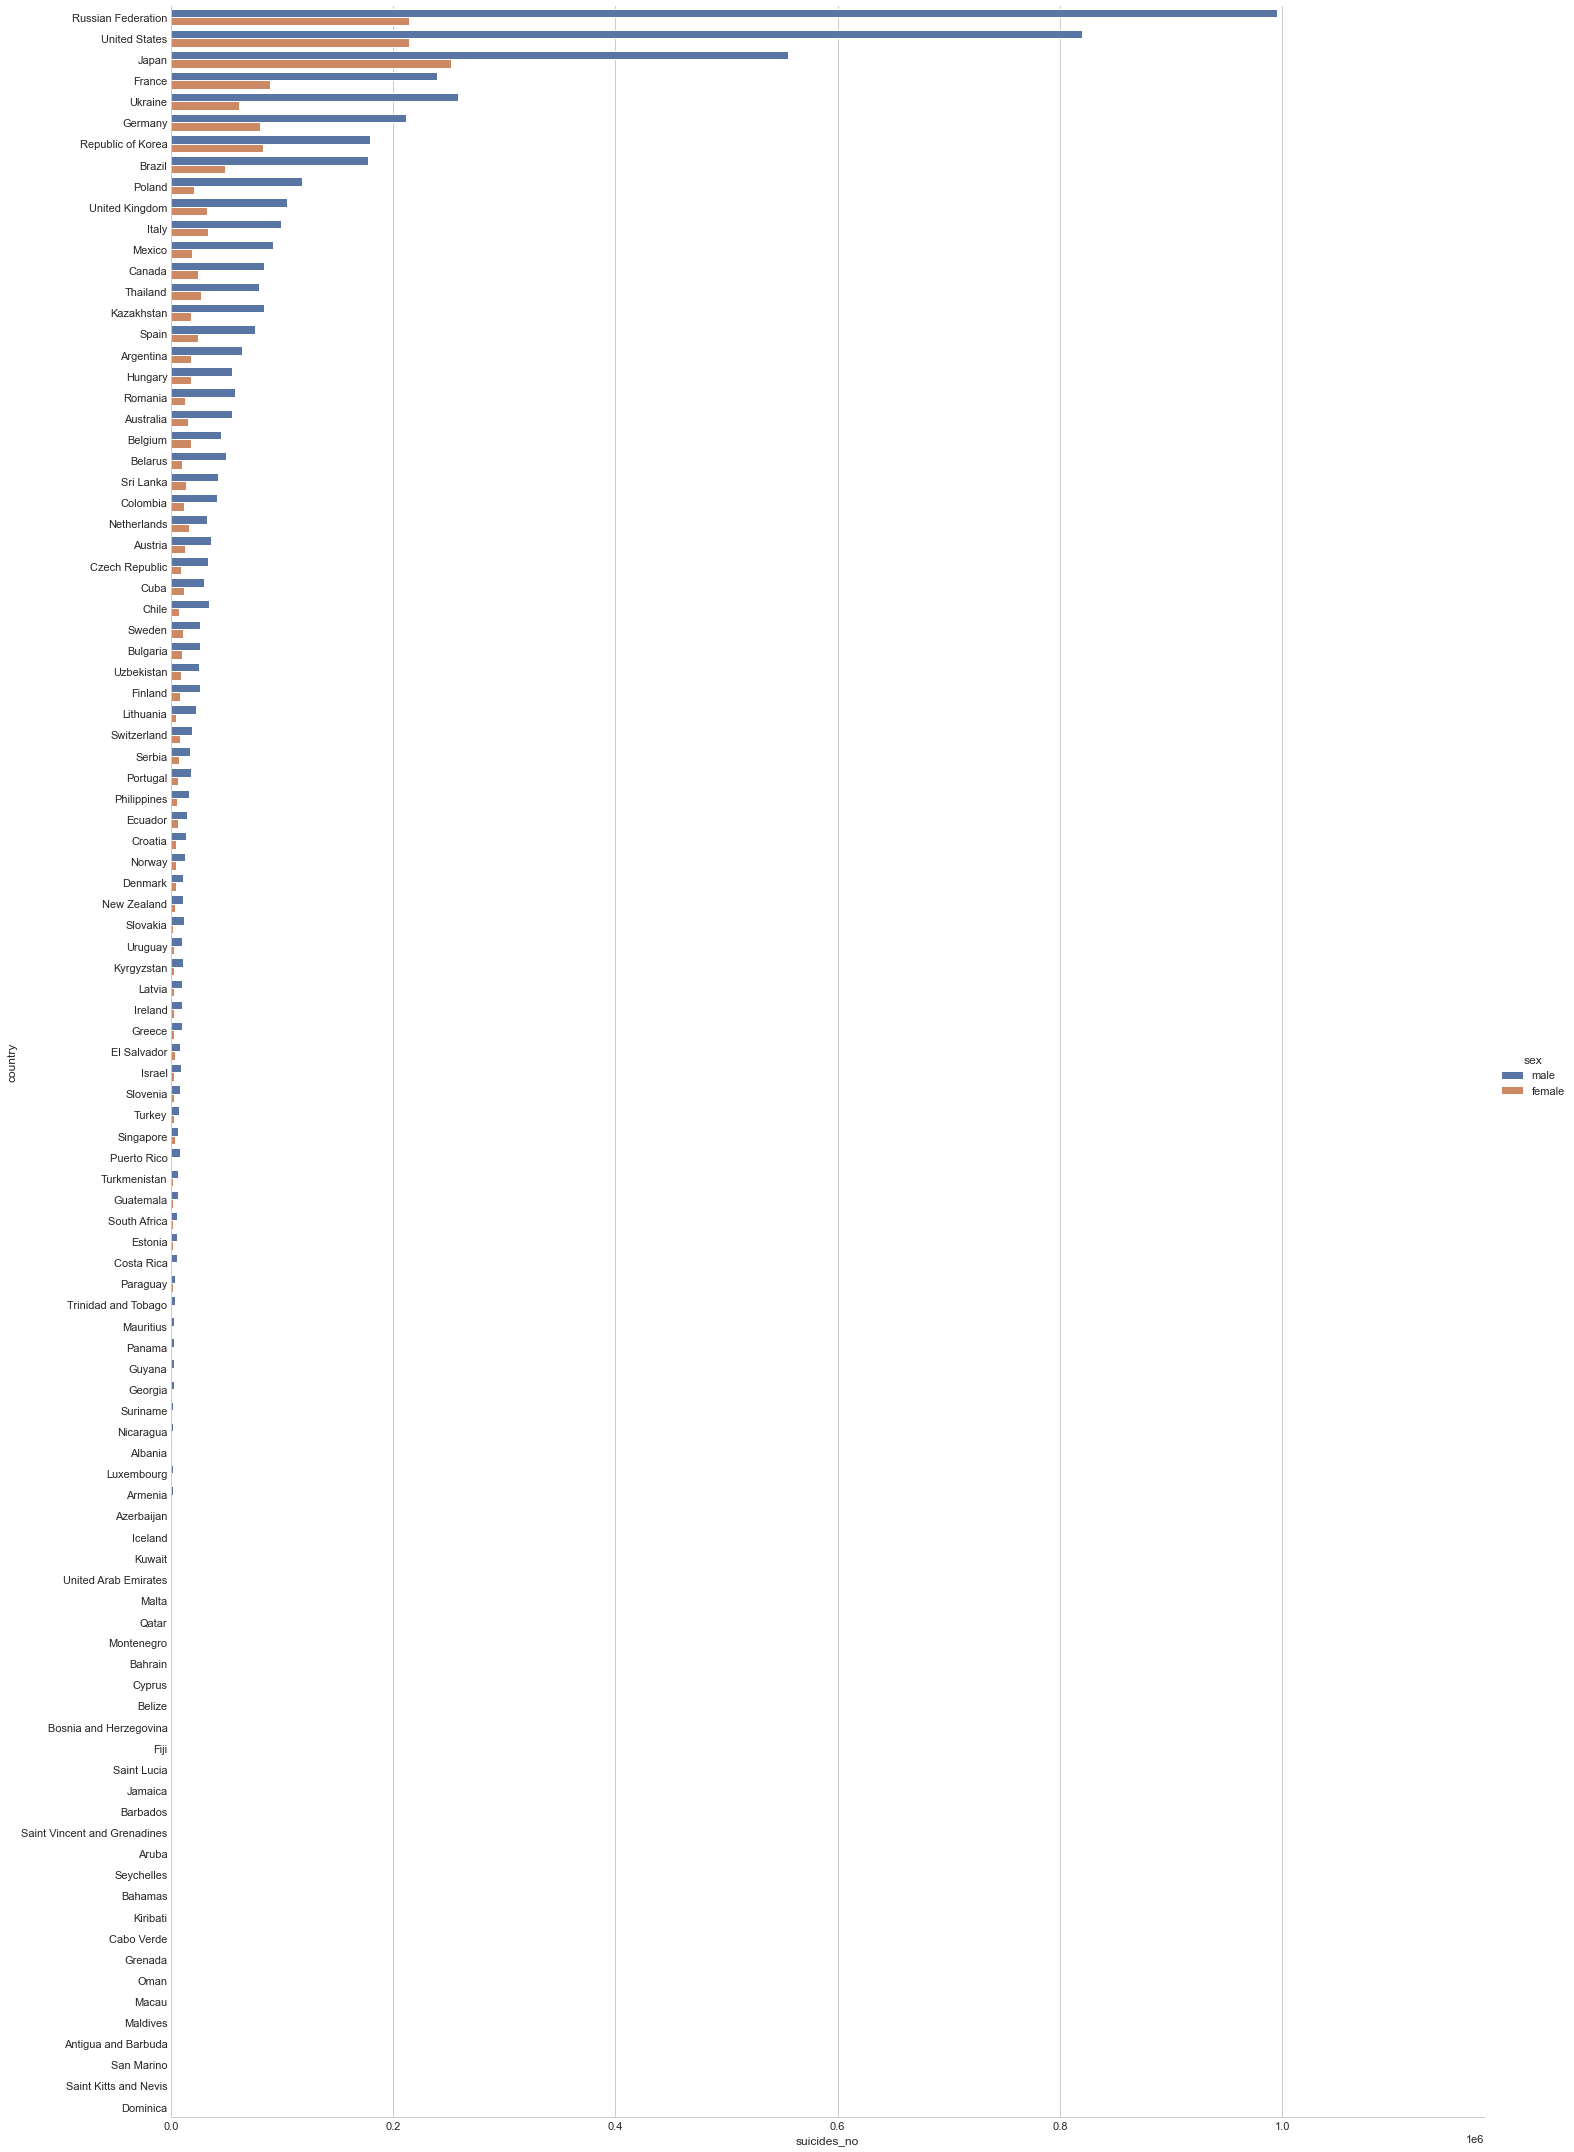

In [57]:
sns.catplot(x="suicides_no", y="country",
                hue="sex", estimator=sum,
                data=d2,  kind="bar",
                height=30, aspect=.7, errwidth=0, order=sorted_country['country'])

In [58]:
#Creating suicide rate variable
suicide_rate =(d2.groupby(['country', 'sex'])['suicides_no'].agg('sum')/d2.groupby(['country','sex'])['population'].agg('sum')*100000).reset_index()

#Creating a variable with sorted countries by suicide rate
country_sort=(d2.groupby(['country'])['suicides_no'].agg('sum')/d2.groupby(['country'])['population'].agg('sum')*100000).reset_index().sort_values(by=[0], ascending=False)

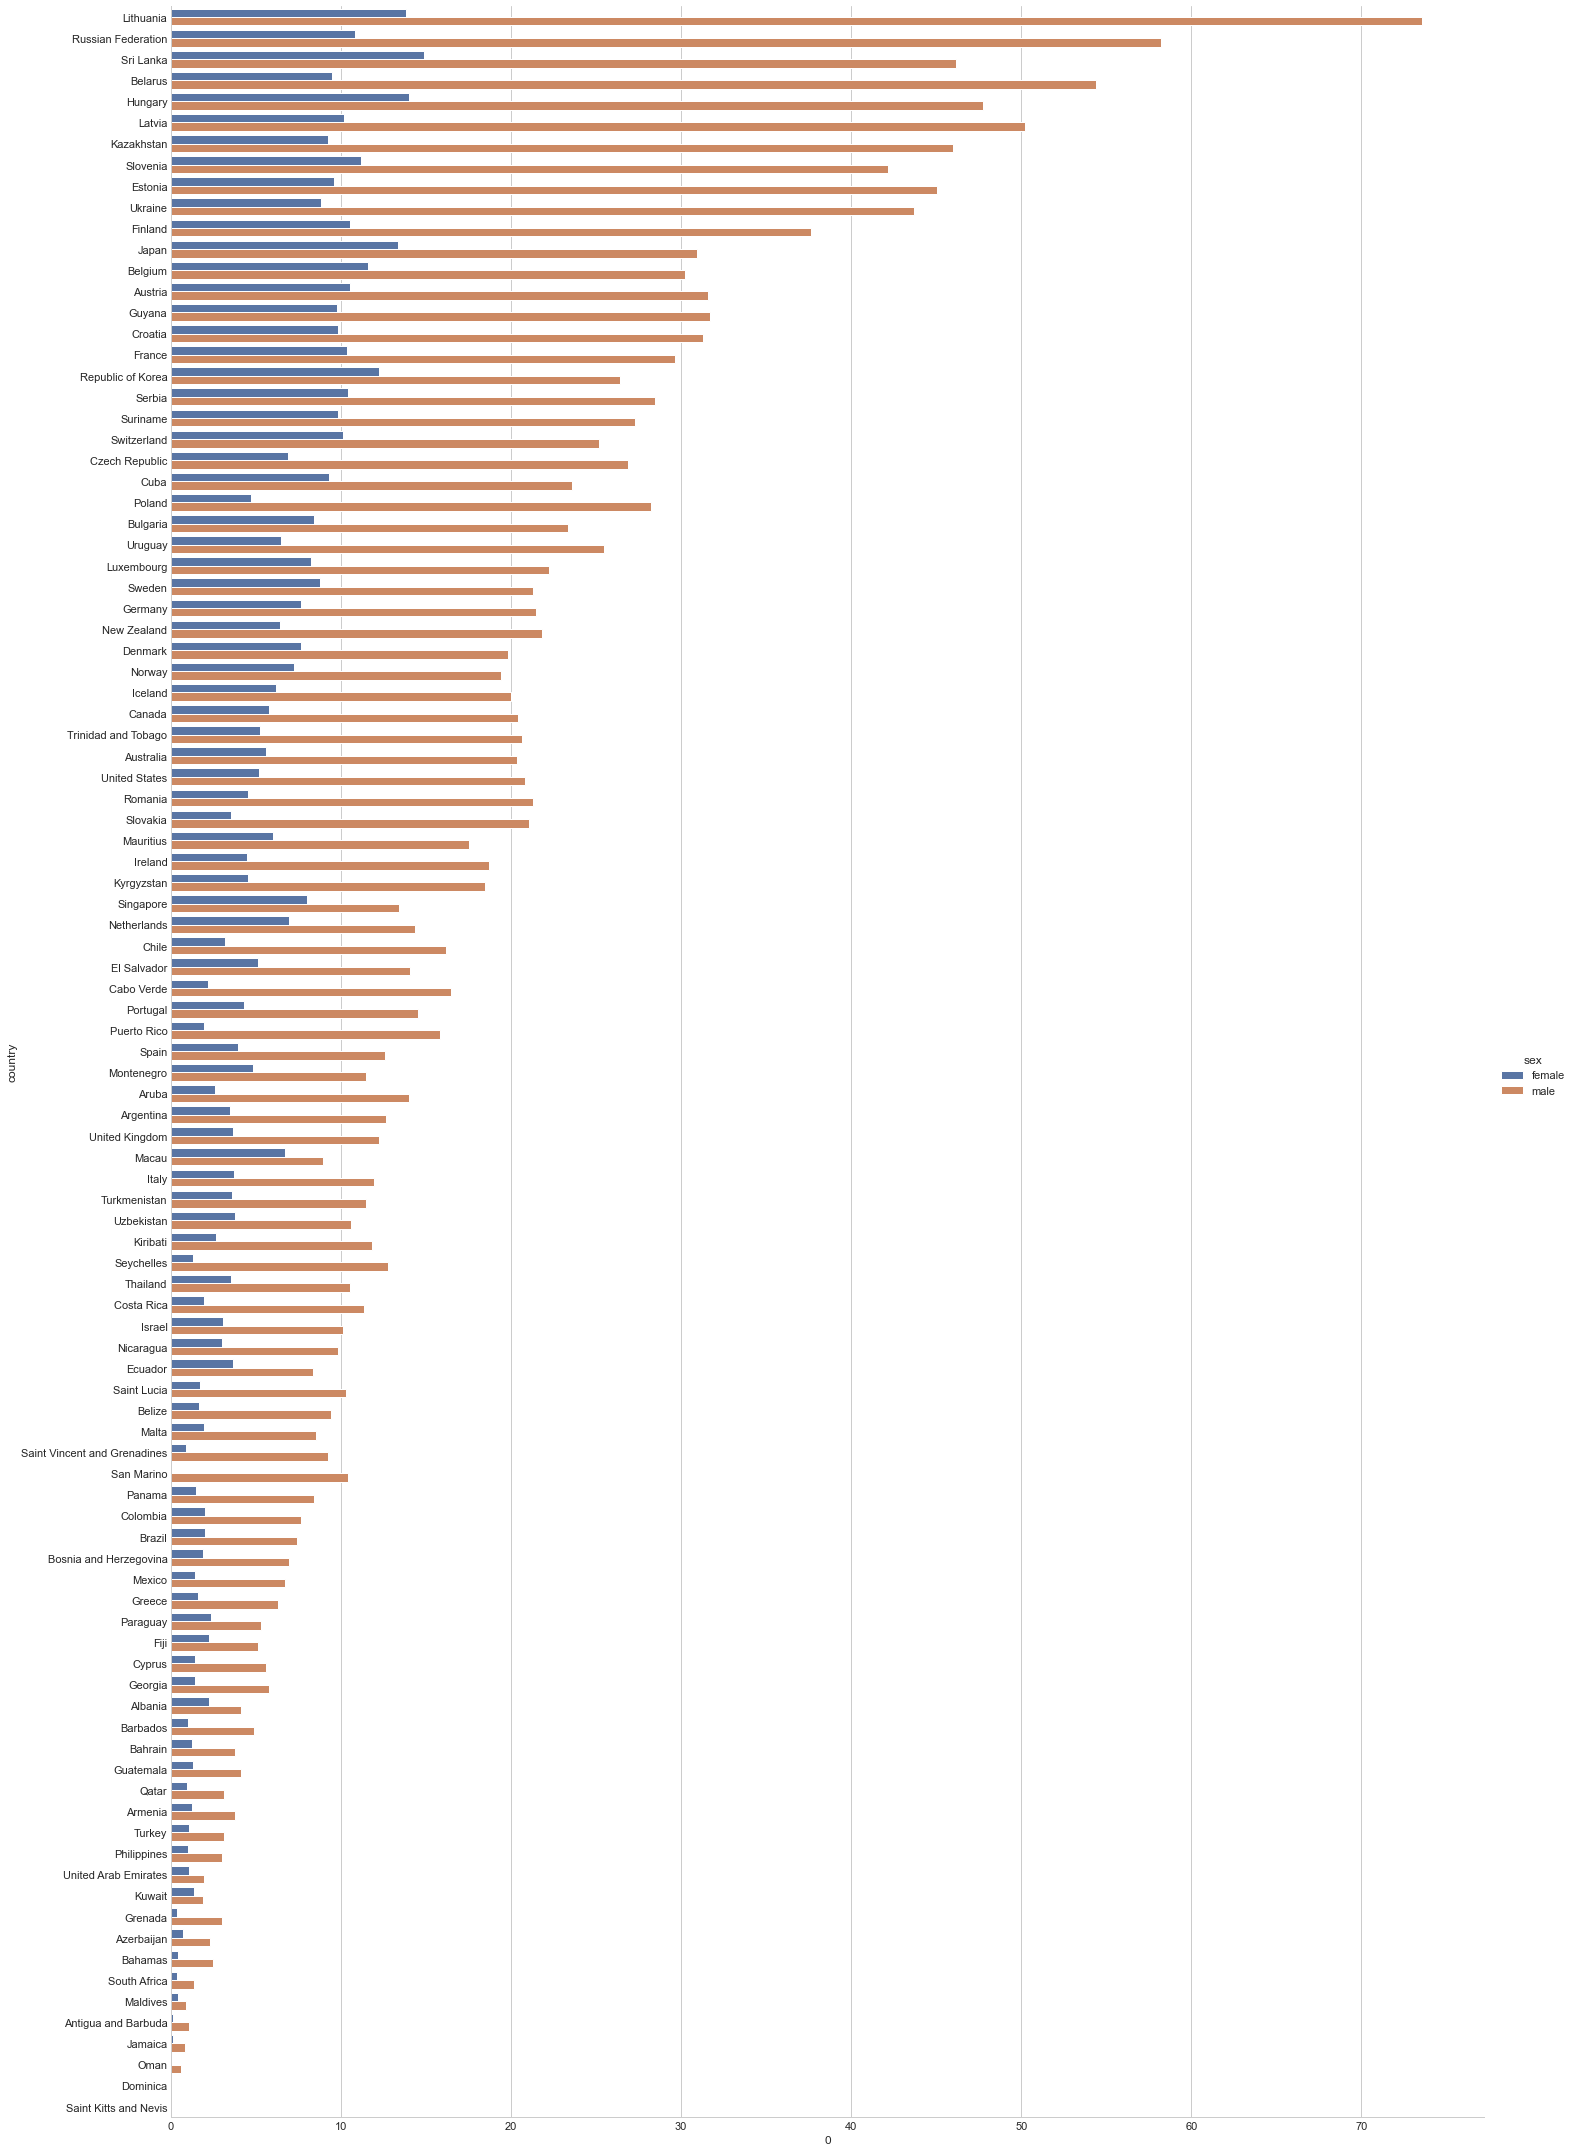

In [59]:
#Bar plot of gender suicide rates with countries sorted from highest rates to lowest rates.
sns.catplot(x=0, y="country",
                hue="sex", estimator=sum,
                data=suicide_rate,  kind="bar",
                height=30, aspect=.7, errwidth=0, order=country_sort['country'])

Text(0.5, 1.0, 'Gender Suicide Ratios by Country ')

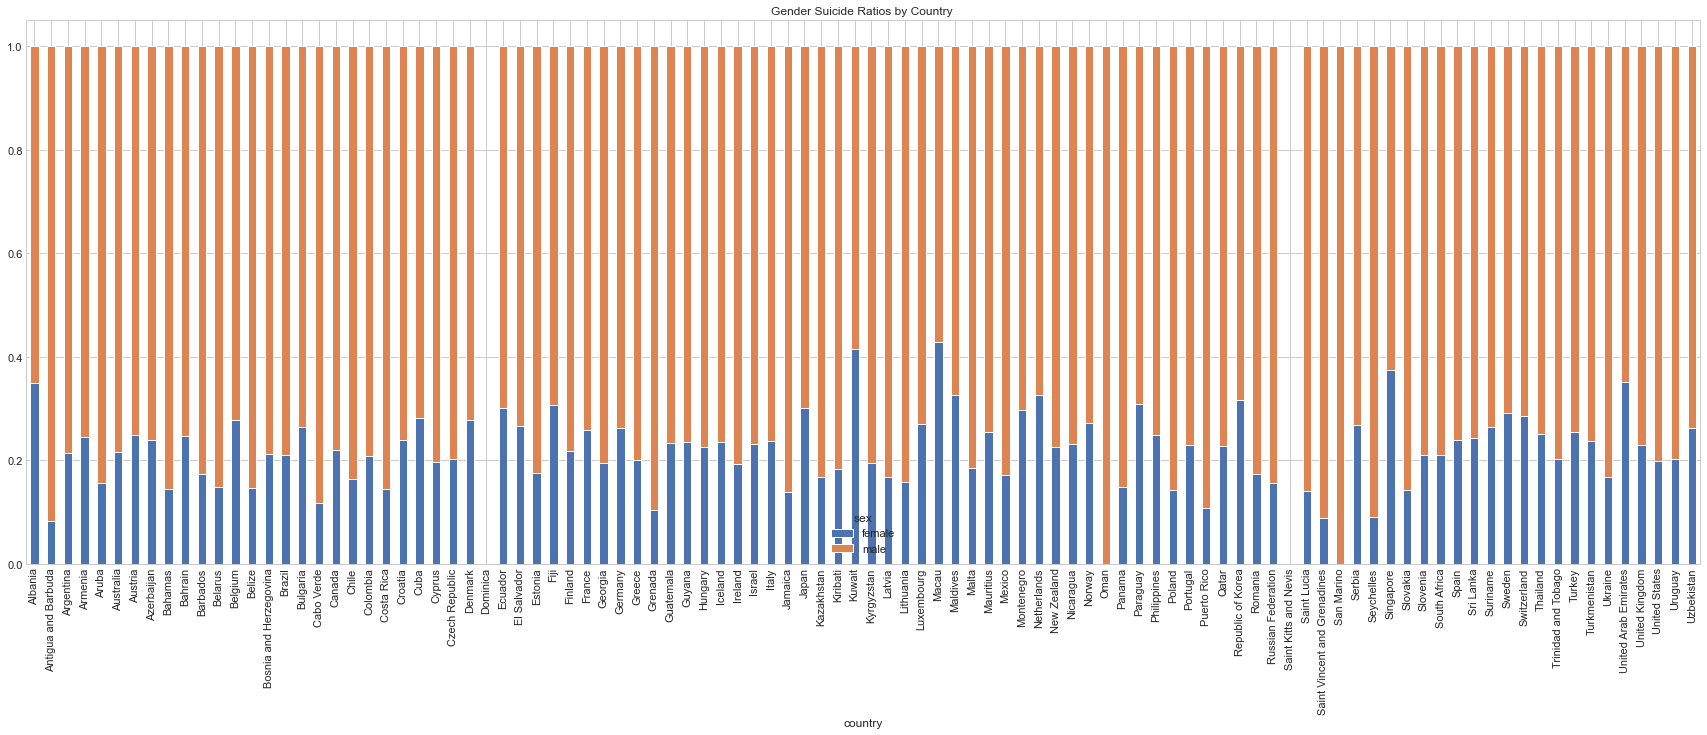

In [60]:
#Stacked barplot of percentage of gender suicide within each country. 
suicide_rate_pct = (suicide_rate.groupby(['country','sex'])[0].sum()/suicide_rate.groupby(['country'])[0].sum())
suicide_rate_pct.unstack().plot.bar(stacked=True,figsize=(30,10)).set_title('Gender Suicide Ratios by Country ')

In [61]:
# Now lets look at the continents 

continent_sex_grouped = merged.groupby(['Continent_Name','sex']).mean()
continent_sex_grouped_suicide_rates = continent_sex_grouped[['suicides/100k pop']]
continent_sex_grouped_suicide_rates

suicides/100k pop
Continent_Name sex                      
Africa         female           3.047095
               male            12.063167
Asia           female           6.931046
               male            20.898575
Europe         female           6.733463
               male            25.892423
North America  female           2.641032
               male            12.451817
Oceania        female           4.880556
               male            18.243107
South America  female           4.566907
               male            18.290583

BI-VARIABLE ANALYSIS ON AGE AND COUNTRY

In [62]:
df_ac = Data[['country', 'age', 'suicides_no', 'suicides/100k pop']]
df_ac.head(20)

,country,age,suicides_no,suicides/100k pop
0,Albania,15-24 years,21,6.71
1,Albania,35-54 years,16,5.19
2,Albania,15-24 years,14,4.83
3,Albania,75+ years,1,4.59
4,Albania,25-34 years,9,3.28
5,Albania,75+ years,1,2.81
6,Albania,35-54 years,6,2.15
7,Albania,25-34 years,4,1.56
8,Albania,55-74 years,1,0.73
9,Albania,5-14 years,0,0.00


In [63]:
pd.Series(pd.Categorical(list(df_ac['age']))).unique() # check out the age groups

[15-24 years, 35-54 years, 75+ years, 25-34 years, 55-74 years, 5-14 years]
Categories (6, object): [15-24 years, 35-54 years, 75+ years, 25-34 years, 55-74 years, 5-14 years]

In [64]:
df_ac = df_ac.replace(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'],
                     ['Generation Z', 'Millenials', 'Generation X', 'Boomers', 'Silent', 'G.I.Generation'])
df_ac.head(20) # replace the names of age groups

,country,age,suicides_no,suicides/100k pop
0,Albania,Millenials,21,6.71
1,Albania,Boomers,16,5.19
2,Albania,Millenials,14,4.83
3,Albania,G.I.Generation,1,4.59
4,Albania,Generation X,9,3.28
5,Albania,G.I.Generation,1,2.81
6,Albania,Boomers,6,2.15
7,Albania,Generation X,4,1.56
8,Albania,Silent,1,0.73
9,Albania,Generation Z,0,0.00


In [65]:
df_ac['age'] = df_ac.age.astype('category')
df_ac['age'] = df_ac['age'].cat.reorder_categories(['Generation Z', 'Millenials', 'Generation X', 'Boomers', 'Silent', 'G.I.Generation'])
df_ac['age'].cat.as_ordered().head(20) # convert age groups object to category in order

0         Millenials
1            Boomers
2         Millenials
3     G.I.Generation
4       Generation X
5     G.I.Generation
6            Boomers
7       Generation X
8             Silent
9       Generation Z
10            Silent
11      Generation Z
12    G.I.Generation
13        Millenials
14    G.I.Generation
15           Boomers
16            Silent
17        Millenials
18            Silent
19      Generation X
Name: age, dtype: category
Categories (6, object): [Generation Z < Millenials < Generation X < Boomers < Silent < G.I.Generation]

In [66]:
df_ac_sorted = df_ac.groupby(['country', 'age']).sum()
df_ac_sorted = df_ac_sorted.sort_values(by = ['suicides_no'], ascending = False).drop(['suicides/100k pop'], axis=1)
df_ac_sorted.head(20)
# Top countries with the highest suicide number by age group

suicides_no
country            age                        
Russian Federation Boomers              479140
United States      Boomers              380917
Japan              Boomers              278679
                   Silent               272705
Russian Federation Silent               267753
                   Generation X         231187
United States      Silent               224770
                   Generation X         182047
Russian Federation Millenials           148611
United States      Millenials           141679
Ukraine            Boomers              124721
France             Boomers              123510
Japan              G.I.Generation       106571
Germany            Boomers               97833
Republic of Korea  Boomers               96292
United States      G.I.Generation        95677
Japan              Generation X          94529
Ukraine            Silent                90385
Germany            Silent                89191
France             Silent                86509

In [67]:
df_ac_sorted1 = df_ac.groupby(['country', 'age']).mean().round(2)
df_ac_sorted1 = df_ac_sorted1.sort_values(by = ['suicides/100k pop'], ascending = False).drop(['suicides_no'], axis=1)
df_ac_sorted1.head(20)
# Top countries with the highest average suicide rate by age group

,,suicides/100k pop
country,age,
Hungary,G.I.Generation,82.74
Republic of Korea,G.I.Generation,69.26
Serbia,G.I.Generation,66.12
Slovenia,G.I.Generation,62.57
Lithuania,Boomers,62.29
Austria,G.I.Generation,60.75
Bulgaria,G.I.Generation,59.93
Croatia,G.I.Generation,58.90
Cuba,G.I.Generation,58.10


BI-VARIABLE ANALYSIS ON AGE AND SEX

In [68]:
# Age/Sex
df_as = Data[['age', 'sex', 'suicides/100k pop']]
df_as.head(20)

,age,sex,suicides/100k pop
0,15-24 years,male,6.71
1,35-54 years,male,5.19
2,15-24 years,female,4.83
3,75+ years,male,4.59
4,25-34 years,male,3.28
5,75+ years,female,2.81
6,35-54 years,female,2.15
7,25-34 years,female,1.56
8,55-74 years,male,0.73
9,5-14 years,female,0.00


In [69]:
df_a1 = df_as.groupby(['age', 'sex']).mean()
df_a1 # sorted by suicide rate

suicides/100k pop
age         sex                      
15-24 years female           4.339800
            male            13.574564
25-34 years female           4.579852
            male            19.819106
35-54 years female           5.923774
            male            23.994000
5-14 years  female           0.462252
            male             0.777831
55-74 years female           7.133258
            male            25.193501
75+ years   female           9.938191
            male            38.015037

In [70]:
df_a1 = df_a1.reset_index()
df_a1 = df_a1.replace(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'], 
                      ['Generation Z', 'Millenials', 'Generation X', 'Boomers', 'Silent', 'G.I.Generation'])

In [71]:
df_a1['age'] = df_a1.age.astype('category')
df_a1['age'] = df_a1['age'].cat.reorder_categories(['Generation Z', 'Millenials', 'Generation X', 'Boomers', 'Silent', 'G.I.Generation'])
df_a1['age'].cat.as_ordered() # same turn object into category in order

0         Millenials
1         Millenials
2       Generation X
3       Generation X
4            Boomers
5            Boomers
6       Generation Z
7       Generation Z
8             Silent
9             Silent
10    G.I.Generation
11    G.I.Generation
Name: age, dtype: category
Categories (6, object): [Generation Z < Millenials < Generation X < Boomers < Silent < G.I.Generation]

In [72]:
df_a1 # cleaned dataframe for plotting

,age,sex,suicides/100k pop
0,Millenials,female,4.339800
1,Millenials,male,13.574564
2,Generation X,female,4.579852
3,Generation X,male,19.819106
4,Boomers,female,5.923774
5,Boomers,male,23.994000
6,Generation Z,female,0.462252
7,Generation Z,male,0.777831
8,Silent,female,7.133258
9,Silent,male,25.193501


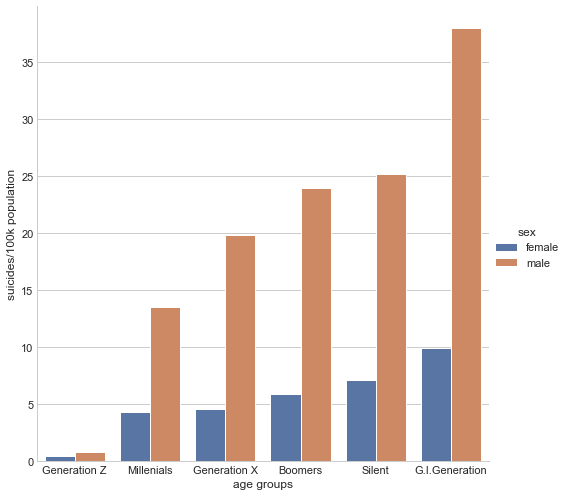

In [73]:
ga = sns.catplot(x='age', y='suicides/100k pop', hue='sex', kind='bar', data=df_a1,
                height=7, aspect=1) # age/sex barplot
ga.set(xlabel='age groups', ylabel='suicides/100k population')

[Text(0, 0.5, 'suicides/100k population'), Text(0.5, 0, 'age groups')]

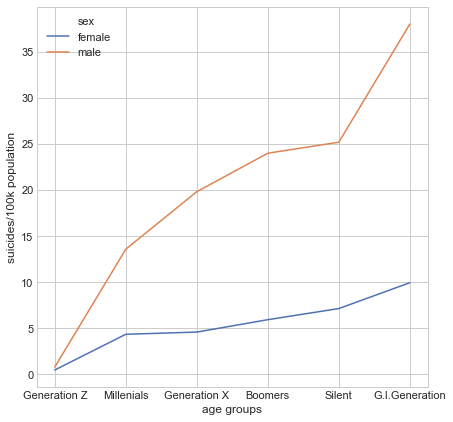

In [74]:
gb = sns.lineplot(data=df_a1, x='age', y='suicides/100k pop', hue='sex') #age/sex lineplot
gb.set(xlabel='age groups', ylabel='suicides/100k population')

TRI-VARIABLE ANALYSIS ON AGE, SEX, AND YEAR

In [75]:
df4 = Data.groupby(["year","sex","age"]).agg({"suicides_no":'sum',"population":'sum'})
df4["Suicide per 100k"] = (df4["suicides_no"]/df4["population"])*100000
df4.head(20)

suicides_no  population  Suicide per 100k
year sex    age                                                   
1985 female 15-24 years         4690    97176582          4.826266
            25-34 years         4894    86518165          5.656616
            35-54 years         9476   123966143          7.644023
            5-14 years           351    97718573          0.359195
            55-74 years         9057    82314480         11.002924
            75+ years           4011    25319112         15.841788
     male   15-24 years        13180    99797857         13.206696
            25-34 years        15877    87018459         18.245554
            35-54 years        26272   122080485         21.520229
            5-14 years           633   101473949          0.623805
            55-74 years        19679    70454952         27.931323
            75+ years           7943    14761329         53.809518
1986 female 15-24 years         4821    98407290          4.899027
            25-34 years         5058    88151128          5.737873
            35-54 years        10047   127985698          7.850096
            5-14 years           303    99335013          0.305028
            55-74 years         9308    84350022         11.034970
            75+ years           4315    26236715         16.446419
     male   15-24 years        13242   100831283         13.132829
            25-34 years        16627    88063660         18.880660

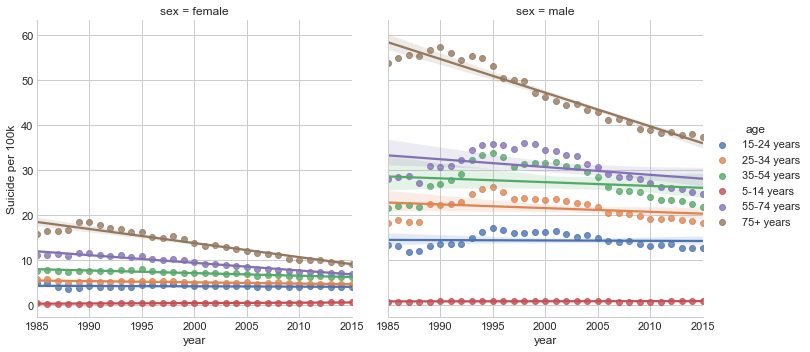

In [76]:
# The graph
df4_2 = df4.reset_index()
sns.lmplot(x="year", y="Suicide per 100k", hue="age", col="sex", data=df4_2);

Text(0.5, 1.0, 'sex = Female')

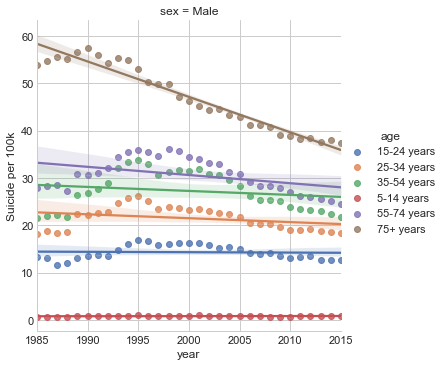

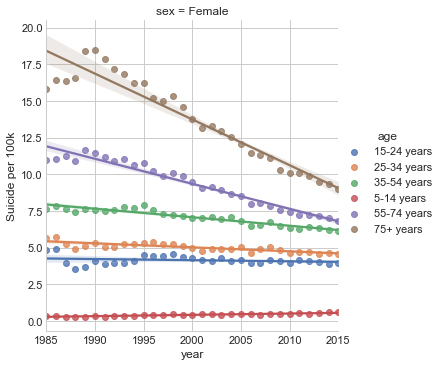

In [77]:
# I want 2 diffrent y-axis, beacause the range of females suicide rate is differnt than the males

df_male = df4.iloc[df4.index.get_level_values('sex') == "male"]
df_male = df_male.reset_index()
sns.lmplot(x="year", y="Suicide per 100k", hue="age", data=df_male);
ax = plt.gca()
ax.set_title("sex = Male")

df_female = df4.iloc[df4.index.get_level_values('sex') == "female"]
df_female = df_female.reset_index()
sns.lmplot(x="year", y="Suicide per 100k", hue="age", data=df_female)
ax = plt.gca()
ax.set_title("sex = Female")


QUAD-VARIABLE ANALISIS

In [78]:
Data_Gby_generation_year_country_sex=Data.groupby(['country','generation','sex','year',])['suicides_no','suicides/100k pop'].aggregate(['min','max',np.mean,'count','sum'])
Data_Gby_generation_year_country_sex.head(100)

<ipython-input-78-3f0d06a2d883>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data_Gby_generation_year_country_sex=Data.groupby(['country','generation','sex','year',])['suicides_no','suicides/100k pop'].aggregate(['min','max',np.mean,'count','sum'])


suicides_no                      \
                                            min max  mean count sum   
country generation      sex    year                                   
Albania Boomers         female 1987           4   4   4.0     1   4   
                               1988           5   5   5.0     1   5   
                               1989           2   2   2.0     1   2   
                               1992           2   4   3.0     2   6   
                               1993           7   7   7.0     2  14   
                               1994           2   4   3.0     2   6   
                               1995           8   8   8.0     1   8   
                               1996           9   9   9.0     1   9   
                               1997           7   7   7.0     1   7   
                               1998           9   9   9.0     1   9   
                               1999           5   5   5.0     1   5   
                               2000           5   5   5.0     1   5   
                               2001          12  12  12.0     1  12   
                               2002          15  15  15.0     1  15   
                               2003          13  13  13.0     1  13   
                               2004          17  17  17.0     1  17   
                               2005           0   0   0.0     1   0   
                               2006           0   0   0.0     1   0   
                               2007          14  14  14.0     1  14   
                               2008          19  19  19.0     1  19   
                               2009           0   0   0.0     1   0   
                        male   1987           9   9   9.0     1   9   
                               1988           5   5   5.0     1   5   
                               1989          18  18  18.0     1  18   
                               1992           7  12   9.5     2  19   
                               1993           9  10   9.5     2  19   
                               1994           6   9   7.5     2  15   
                               1995          14  14  14.0     1  14   
                               1996          12  12  12.0     1  12   
                               1997          30  30  30.0     1  30   
                               1998          29  29  29.0     1  29   
                               1999          31  31  31.0     1  31   
                               2000           4   4   4.0     1   4   
                               2001          34  34  34.0     1  34   
                               2002          35  35  35.0     1  35   
                               2003          28  28  28.0     1  28   
                               2004          39  39  39.0     1  39   
                               2005           0   0   0.0     1   0   
                               2006           0   0   0.0     1   0   
                               2007          29  29  29.0     1  29   
                               2008          37  37  37.0     1  37   
                               2009           0   0   0.0     1   0   
        G.I. Generation female 1987           0   1   0.5     2   1   
                               1988           2   3   2.5     2   5   
                               1989           0   1   0.5     2   1   
                               1992           0   0   0.0     1   0   
                               1993           0   0   0.0     1   0   
                               1994           2   2   2.0     1   2   
                               1995           2   2   2.0     1   2   
                               1996           2   2   2.0     1   2   
                               1997           2   2   2.0     1   2   
                               1998           0   0   0.0     1   0   
                               1999           4   4   4.0     1   4   
                               2000           2   2   2.0   

In [79]:
Data_Gby_generation_year_country_sex.loc[:,'suicides_no']['sum'].sort_values(ascending=False).head(5)

country             generation  sex   year
Russian Federation  Boomers     male  1994    32648
                                      1993    29584
                                      1992    23782
                                      1995    21706
                                      2001    21262
Name: sum, dtype: int64

In [80]:
Data_Gby_generation_year_country_sex.loc[:,'suicides/100k pop']['sum'].sort_values(ascending=False).head(5)

country            generation  sex   year
Republic of Korea  Silent      male  2010    265.05
                                     2005    258.25
                                     2004    254.43
                                     2009    253.33
                                     2007    245.58
Name: sum, dtype: float64

# Autocorrelations analysis

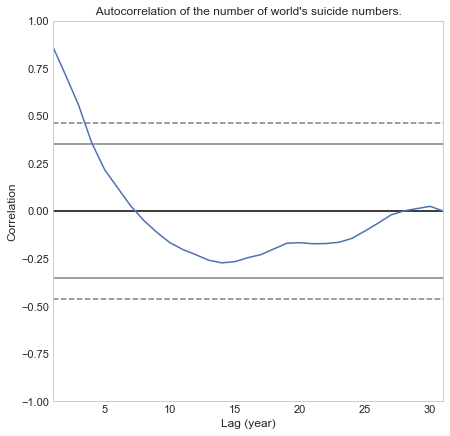

In [81]:
Data_Gby_year=Data.groupby('year')['suicides_no'].sum()
suicide_autocorrelation=autocorrelation_plot(Data_Gby_year)
suicide_autocorrelation.set_title(" Autocorrelation of the number of world's suicide numbers.")
suicide_autocorrelation.set_ylabel("Correlation")
suicide_autocorrelation.set_xlabel("Lag (year)")
suicide_autocorrelation

In [82]:
Data_corr=Data[['suicides_no','population','gdp_per_capita ($)']]
Data_corr.corr()

,suicides_no,population,gdp_per_capita ($)
suicides_no,1.000000,0.616105,0.062168
population,0.616105,1.000000,0.083006
gdp_per_capita ($),0.062168,0.083006,1.000000


In [83]:
Data_suicide_population=Data.groupby(Data.year)[['suicides_no','population']].sum()
Data_suicide_population.columns=['World_Suicide', 'World_Population']
Data_suicide_population=Data_suicide_population.iloc[:-1,:]
Data_suicide_population.tail(10)

,World_Suicide,World_Population
year,,
2005,234375,1734909645
2006,233361,1840908837
2007,233408,1859564353
2008,235447,1860620851
2009,243487,1976228366
2010,238702,1997297329
2011,236484,1993362332
2012,230160,1912812088
2013,223199,1890161710


[Text(0.5, 1.0, 'World Population vs World Suicides'),
 Text(0.5, 0, 'World Suicides'),
 Text(0, 0.5, 'World Population')]

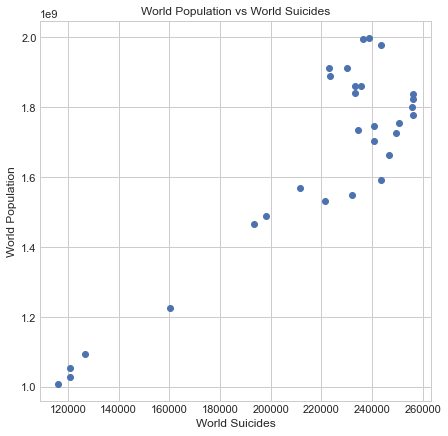

In [84]:
plt.scatter(Data_suicide_population['World_Suicide'],Data_suicide_population['World_Population'])
plt.gca().update(dict(title='World Population vs World Suicides', xlabel='World Suicides', ylabel="World Population",))
# plt.xlabel("World Population")
# plt.ylabel('World Suicides')
# plt.title('World Population vs World Suicides')

MACHINE LEARNING 
The objective is to build a model using regression analyis that will predict future yearly  suicide rates. 
first we built the model using all the dataset to see how it fits the data.Satistied with the fit, we also verified the validity of the model by splitting the data into text and train set and 
using the train set to predict the test set and the results were very satisfactory with an r2 of >90%. veryfying the 
validity of the ML model.

P.S. We drop 2016 data from the ML analysis because that entry was an outlier(too small a value), probably because data collection was still in progress for 2016 year when the data was put together by kaggle in 2018

In [85]:
Data_suicide_year=Data.groupby(Data.year)['suicides_no'].sum().reset_index().iloc[:-1,:]
Data_suicide_year.head()                                       


,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244


In [86]:
x_axis=np.array(Data_suicide_year['year']).reshape(-1,1)
y_axis=np.array(Data_suicide_year['suicides_no']).reshape(-1,1) 
x_axis
x_train,x_test,y_train,y_test=train_test_split(x_axis,y_axis , test_size=0.3,random_state=90)

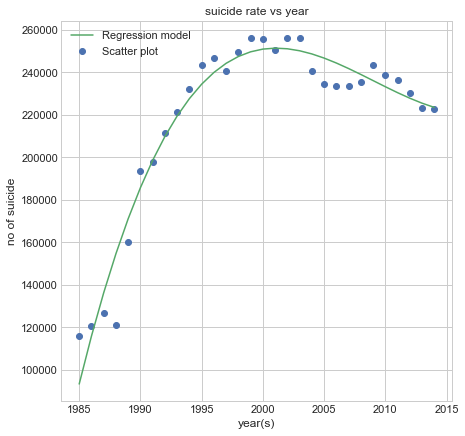

In [87]:
#First method of verification
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x_axis)
poly.fit(x_poly,y_axis)
Model=LinearRegression()
Model=Model.fit(x_poly,y_axis)
Coeficient=Model.coef_
Intercept=Model.intercept_

#Testing the model
x=x_axis
y=Intercept+Coeficient[0,1]*x+Coeficient[0,2]*x**2+Coeficient[0,3]*x**3
plt.scatter(x_axis,y_axis,label='Scatter plot')
plt.gca().update(dict(title='suicide rate vs year', xlabel='year(s)', ylabel="no of suicide"))
plt.plot(x,y, color='g',label='Regression model')
plt.legend()

In [88]:
#Second verification method
poly=PolynomialFeatures(degree=3)
x_train_poly,x_test_poly=poly.fit_transform(x_train),poly.fit_transform(x_test)
poly.fit(x_train_poly,y_train)
poly.fit(x_test_poly,y_test)
Model=LinearRegression()
Model=Model.fit(x_train_poly,y_train)
print(Model.score(x_test_poly,y_test))
r2_score(y_test,Model.predict(x_test_poly))


0.9783211988106274


0.9783211988106274